# Testing sphere gain equations

**Scott Prahl**

**Feb 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iadpython
%config InlineBackend.figure_format='retina'

## Check no baffle calculations

In [2]:
R = 50
d_sphere = 2 * R
d_sample = 30
d_third = 20
d_detector = 18
s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                     r_detector=0.5, r_wall=0.75, r_std=0.8)
s.sample.uru = 0.6
s.third.uru = 0.8
print(str(s))


Reflectance Sphere
        diameter =  100.00 mm
          radius =   50.00 mm
   relative area =    95.9%
       uru walls =    75.0%
    uru standard =    80.0%
          baffle = False
Sample Port
        diameter =   30.00 mm
          radius =   15.00 mm
           chord =   15.18 mm
         sagitta =    2.30 mm
          center = (   0.0,    0.0,  -50.0) mm
   relative area =    2.30%
             uru =   60.00%
Third Port
        diameter =   20.00 mm
          radius =   10.00 mm
           chord =   10.05 mm
         sagitta =    1.01 mm
          center = (   0.0,    0.0,   50.0) mm
   relative area =    1.01%
             uru =   80.00%
Detector Port
        diameter =   18.00 mm
          radius =    9.00 mm
           chord =    9.04 mm
         sagitta =    0.82 mm
          center = (  50.0,    0.0,    0.0) mm
   relative area =    0.82%
             uru =   50.00%
Gain range
         nothing =   3.720
        standard =   3.994
            100% =   4.069



In [3]:
s.baffle = False
print(repr(s))
s.do_N_photons(100000)

Sphere: d=100.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 30.0mm, uru= 60.0%
     Third: d= 20.0mm, uru= 80.0%
  Detector: d= 18.0mm, uru= 50.0%

average detected   = 0.016 ± 0.000
average gain       = 3.964 ± 0.048
calculated gain    = 3.922
average bounces    = 32.772 ± 0.009


In [4]:
s.baffle = True
print(repr(s))
s.do_N_photons(100000)

Sphere: d=100.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 30.0mm, uru= 60.0%
     Third: d= 20.0mm, uru= 80.0%
  Detector: d= 18.0mm, uru= 50.0%

average detected   = 0.012 ± 0.000
average gain       = 3.921 ± 0.071
calculated gain    = 3.854
average bounces    = 32.783 ± 0.008


In [5]:
def test_sphere():
    R = 30
    d_sphere = 2 * R
    d_sample = 20
    d_third = 15
    d_detector = 10
    s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                         r_detector=0.5, r_wall=0.75, r_std=0.8)
    return s

s = test_sphere()
s.sample.uru = 0.5
s.third.uru = 0.95

In [6]:
print('case 1, third = empty, sample = empty, no baffle')
s = test_sphere()
s.sample.uru = 0.0
s.third.uru = 0.00
print(repr(s))
s.do_N_photons(100000)
print()

print('case 2, third = empty, sample = 50%, no baffle')
s = test_sphere()
s.sample.uru = 0.5
s.third.uru = 0.0
print(repr(s))
s.do_N_photons(100000)
print()

print('case 3, third = 95%, sample = 50%, no baffle')
s = test_sphere()
s.sample.uru = 0.5
s.third.uru = 0.95
print(repr(s))
s.do_N_photons(100000)
print()

case 1, third = empty, sample = empty, no baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 20.0mm, uru=  0.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.012 ± 0.000
average gain       = 3.503 ± 0.077
calculated gain    = 3.508
average bounces    = 18.058 ± 0.047

case 2, third = empty, sample = 50%, no baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.013 ± 0.000
average gain       = 3.732 ± 0.065
calculated gain    = 3.693
average bounces    = 25.221 ± 0.036

case 3, third = 95%, sample = 50%, no baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= False
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru= 95.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.014 ± 0.000
average gain       = 3.960 ± 0.051
calculated gain    = 3.910
avera

In [7]:
print('case 1, third = empty, sample = empty, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.0
s.third.uru = 0.00
print(repr(s))
s.do_N_photons(100000)
print()

print('case 2, third = empty, sample = 50%, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.5
s.third.uru = 0.0
print(repr(s))
s.do_N_photons(100000)
print()

print('case 3, third = 95%, sample = 50%, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.5
s.third.uru = 0.95
print(repr(s))
s.do_N_photons(100000)
print()

case 1, third = empty, sample = empty, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru=  0.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.009 ± 0.000
average gain       = 3.517 ± 0.056
calculated gain    = 3.496
average bounces    = 18.042 ± 0.037

case 2, third = empty, sample = 50%, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru=  0.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.009 ± 0.000
average gain       = 3.625 ± 0.036
calculated gain    = 3.630
average bounces    = 25.219 ± 0.019

case 3, third = 95%, sample = 50%, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru= 50.0%
     Third: d= 15.0mm, uru= 95.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.010 ± 0.000
average gain       = 3.888 ± 0.059
calculated gain    = 3.845
average bounces  

In [8]:
print('case 3, third = 95%, sample = 50%, baffle')
s = test_sphere()
s.baffle=True
s.sample.uru = 0.95
s.third.uru = 0.25
print(repr(s))
s.do_N_photons(100000)
print()

case 3, third = 95%, sample = 50%, baffle
Sphere: d=60.00, r_wall= 75.0%, r_std= 80.0%, baffle= True
    Sample: d= 20.0mm, uru= 95.0%
     Third: d= 15.0mm, uru= 25.0%
  Detector: d= 10.0mm, uru= 50.0%

average detected   = 0.010 ± 0.000
average gain       = 3.801 ± 0.043
calculated gain    = 3.819
average bounces    = 32.109 ± 0.012



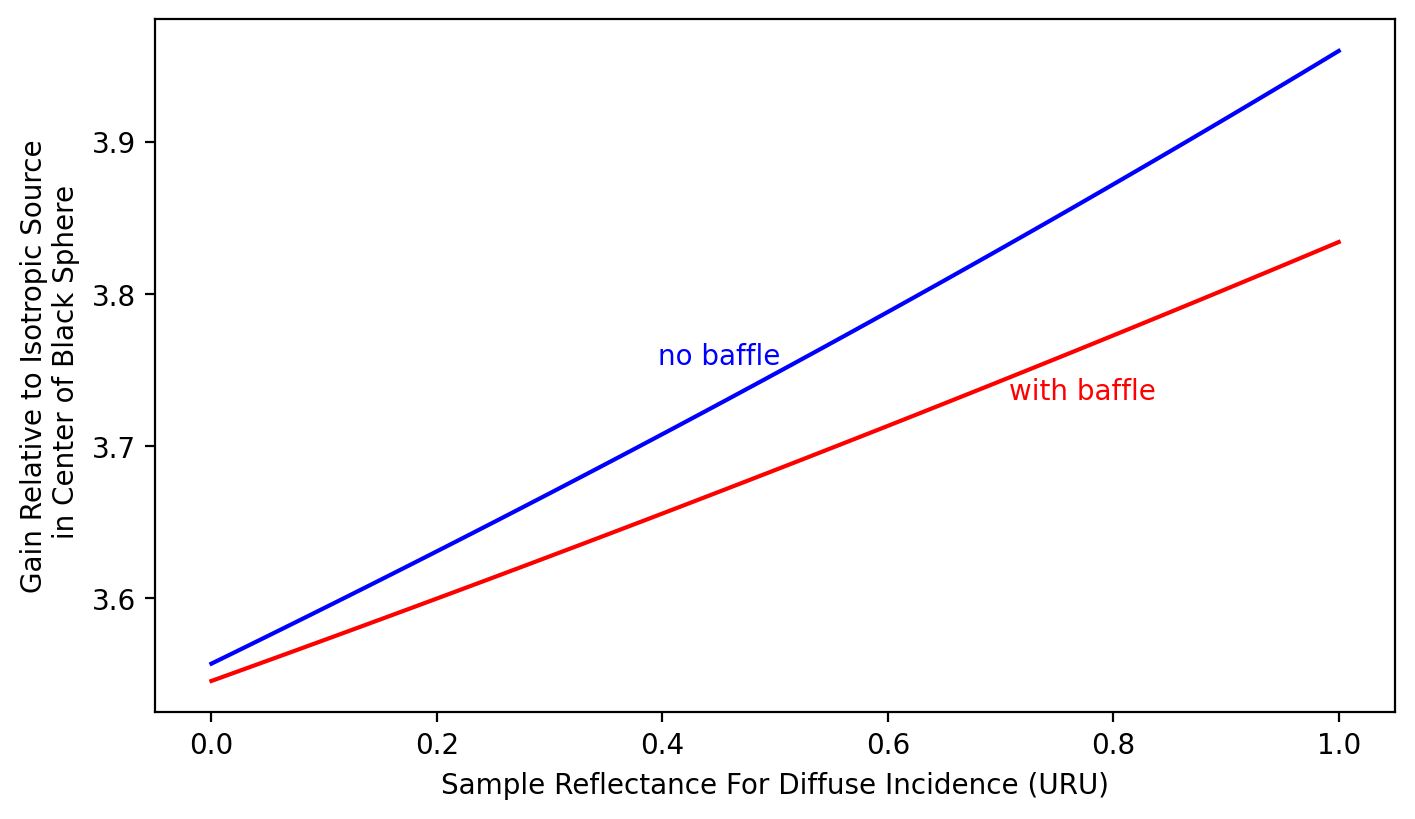

In [9]:
plt.figure(figsize=(8,4.5))
sample_uru = np.linspace(0,1,100)
s.baffle = False
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, 'b')
plt.text(sample_uru[50], gain[50], 'no baffle', color='blue', ha='right', va='bottom')

s.baffle = True
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, 'r')
plt.text(sample_uru[70], gain[70], 'with baffle', color = 'red', ha='left', va='top')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Gain Relative to Isotropic Source\n in Center of Black Sphere')
plt.show()

and we see that the presence or absence of a baffle has a small effect

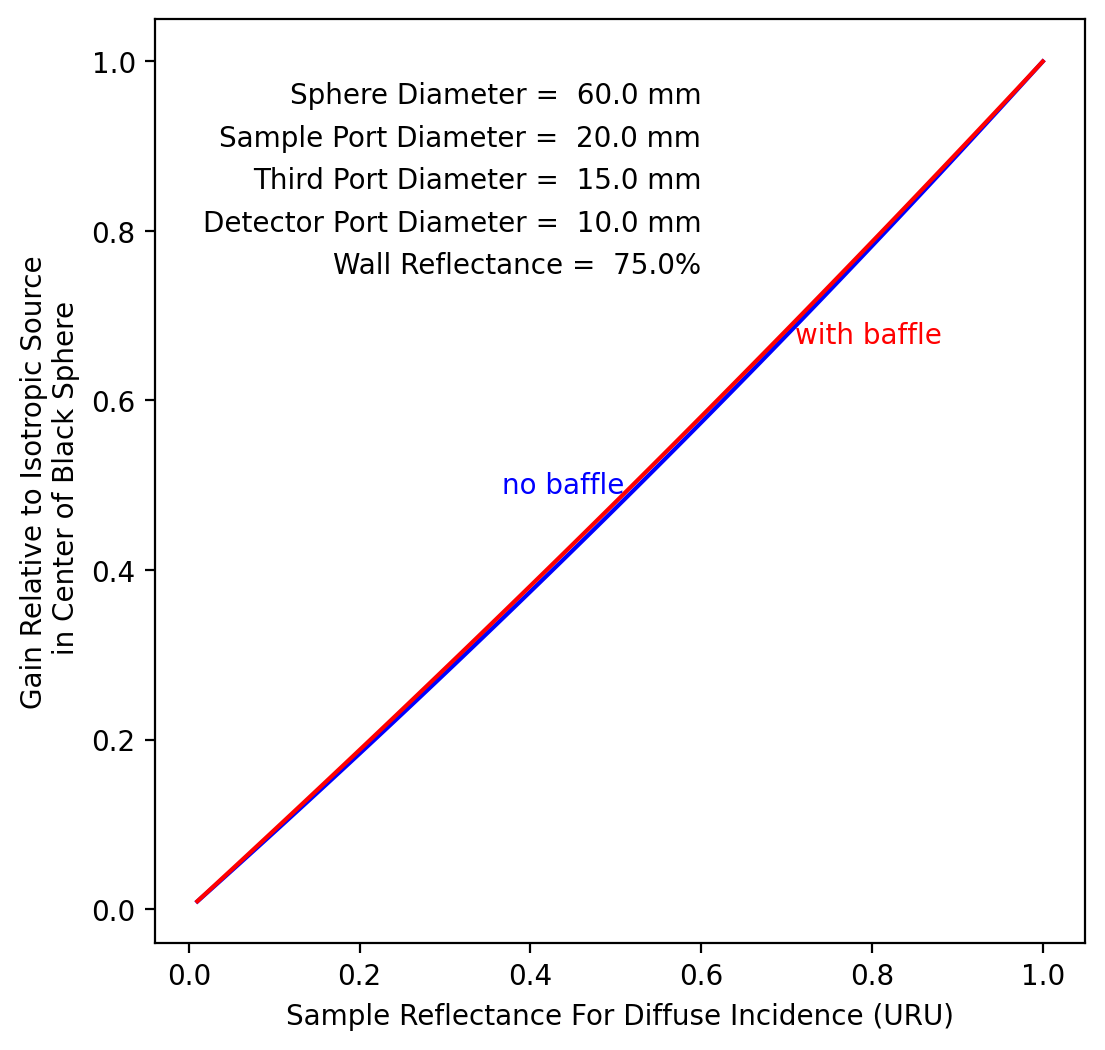

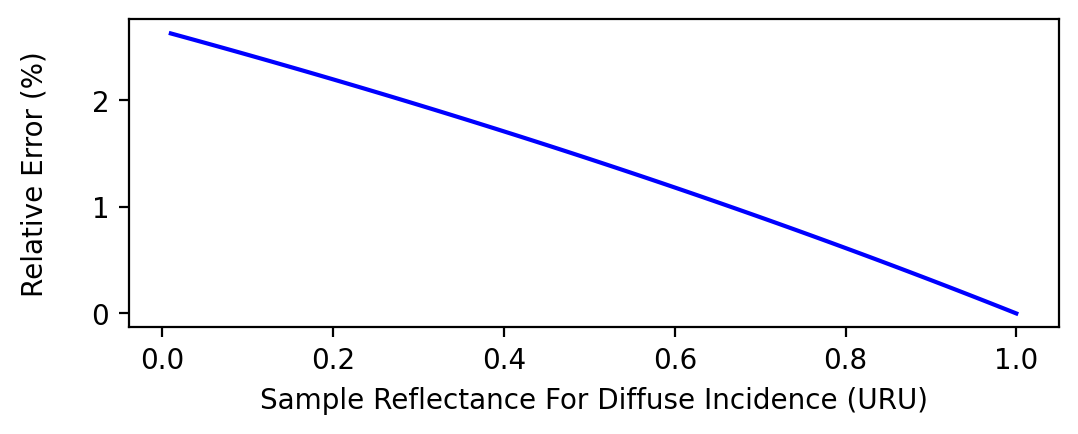

In [10]:
plt.figure(figsize=(6,6))
plt.text(0.6,0.95,"Sphere Diameter = %5.1f mm"%s.d, ha='right')
plt.text(0.6,0.90,"Sample Port Diameter = %5.1f mm"%s.sample.d, ha='right')
plt.text(0.6,0.85,"Third Port Diameter = %5.1f mm"%(s.third.d), ha='right')
plt.text(0.6,0.80,"Detector Port Diameter = %5.1f mm"%(s.detector.d), ha='right')
plt.text(0.6,0.75,"Wall Reflectance = %5.1f%%"%(100*s.r_wall), ha='right')

sample_uru = np.linspace(0.01,1,100)
s.baffle = False
gain = s.gain(sample_uru)
measure = sample_uru * gain / gain[-1]
plt.plot(sample_uru, measure, 'b')
plt.text(sample_uru[50], measure[50], 'no baffle', color='blue', ha='right', va='bottom')

s.baffle = True
gain = s.gain(sample_uru)
measure1 = sample_uru * gain / gain[-1]
plt.plot(sample_uru, measure1, 'r')
plt.text(sample_uru[70], measure1[70], 'with baffle', color = 'red', ha='left', va='top')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Gain Relative to Isotropic Source\n in Center of Black Sphere')
plt.show()

plt.figure(figsize=(6,2))
plt.plot(sample_uru, 100*(measure1-measure)/sample_uru, 'b')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Relative Error (%)\n')
plt.show()

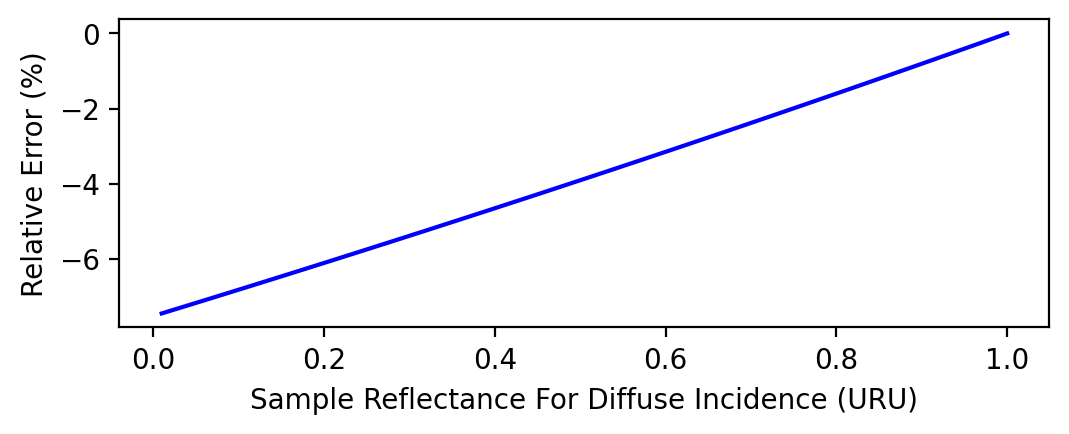

In [11]:
plt.figure(figsize=(6,2))
plt.plot(sample_uru, 100*(measure1-sample_uru)/sample_uru, 'b')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Relative Error (%)')
plt.show()

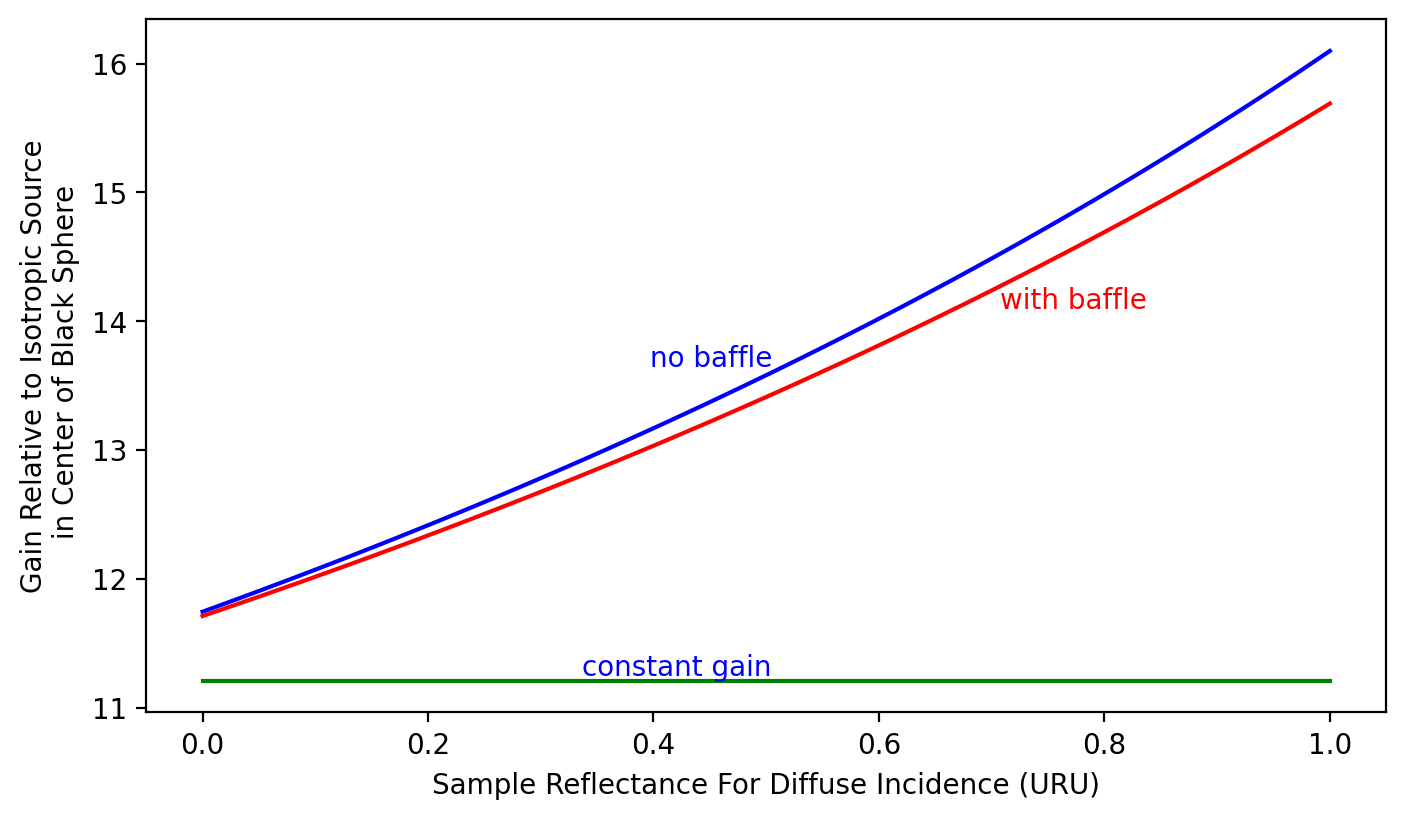

In [12]:
R = 50
d_sphere = 2 * R
d_sample = 30
d_third = 20
d_detector = 18
s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                     r_detector=0.5, r_wall=0.95, r_std=0.97)
s.sample.uru = 0.8

plt.figure(figsize=(8,4.5))
sample_uru = np.linspace(0,1,100)

s.baffle = False
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, 'b')
plt.text(sample_uru[50], gain[50], 'no baffle', color='blue', ha='right', va='bottom')

s.baffle = True
gain = s.gain(sample_uru)
plt.plot(sample_uru, gain, 'r')
plt.text(sample_uru[70], gain[70], 'with baffle', color = 'red', ha='left', va='top')

gain = np.full_like(sample_uru, 1/(1-s.a_wall*s.r_wall))
plt.plot(sample_uru, gain, 'g')
plt.text(sample_uru[50], gain[50], 'constant gain', color='blue', ha='right', va='bottom')

plt.xlabel('Sample Reflectance For Diffuse Incidence (URU)')
plt.ylabel('Gain Relative to Isotropic Source\n in Center of Black Sphere')
plt.show()



## Reflection



## Transmission

The idea is to subtract background and normalize by reflectance from a reference standard.

If $P$ is the detected signal on the detector then

$$
M_T = r_\mathrm{standard} \cdot \frac{P_\mathrm{sample} - P_\mathrm{background}}{P_\mathrm{standard} - P_\mathrm{background}}
$$

<center>
    <img src="sphereMT.png" width="100%" />
</center>

we note that in the standard measurement the baffle is not between the standard (sphere wall) and the reflector.

<center>
    <img src="sphereMT2.png" width="100%" />
</center>

An fiber might be used to collect light for the detector.  The limited numerical aperture of the fiber prevents cross-talk between the sample and the detector.

<center>
    <img src="sphereMT2a.png" width="70%" />
</center>

<center>
    <img src="sphereMT2b.png" width="70%" />
</center>


So for a transmission experiment, the gain when the standard is always present will be `gain(r_sample, r_standard)`.  For the 100% transmission case with nothing in the sample port, the gain will be `gain(0, r_standard)`.  Therefore the value of `M_T` will be
$$
M_T = \frac{P_\text{detector}(\text{sample})}{P_\text{detector}(\text{nothing})} =
\frac{\text{UT1}\cdot P_i \cdot G(\text{URU}, r_\text{standard})}{P_i r_\text{standard} (1-a_\text{sample}) \cdot G(0, r_\text{standard})}
= \text{UT1}\cdot \frac{ G(\text{URU}, r_\text{standard})}{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}
$$

When the unscattered light is allowed to leave the sphere, then if we assume
$$
\text{UT1} = \text{UT1}' + T_\text{unscattered}
$$
the equations are slightly different
$$
M_T = \frac{\text{UT1}'\cdot P_i \cdot G(\text{URU}, 0)}{P_i \cdot G(0, r_\text{standard})}
= \text{UT1}'\cdot \frac{ G(\text{URU}, 0)}{G(0, r_\text{standard})}
$$

So if we know $P_\text{detector}(\text{sample})$ and $P_\text{detector}(\text{nothing})$ then we can calculate $M_T$ or even UT1.

$$
\text{UT1} = M_T \cdot \frac{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}{ G(\text{URU}, r_\text{standard})}
$$

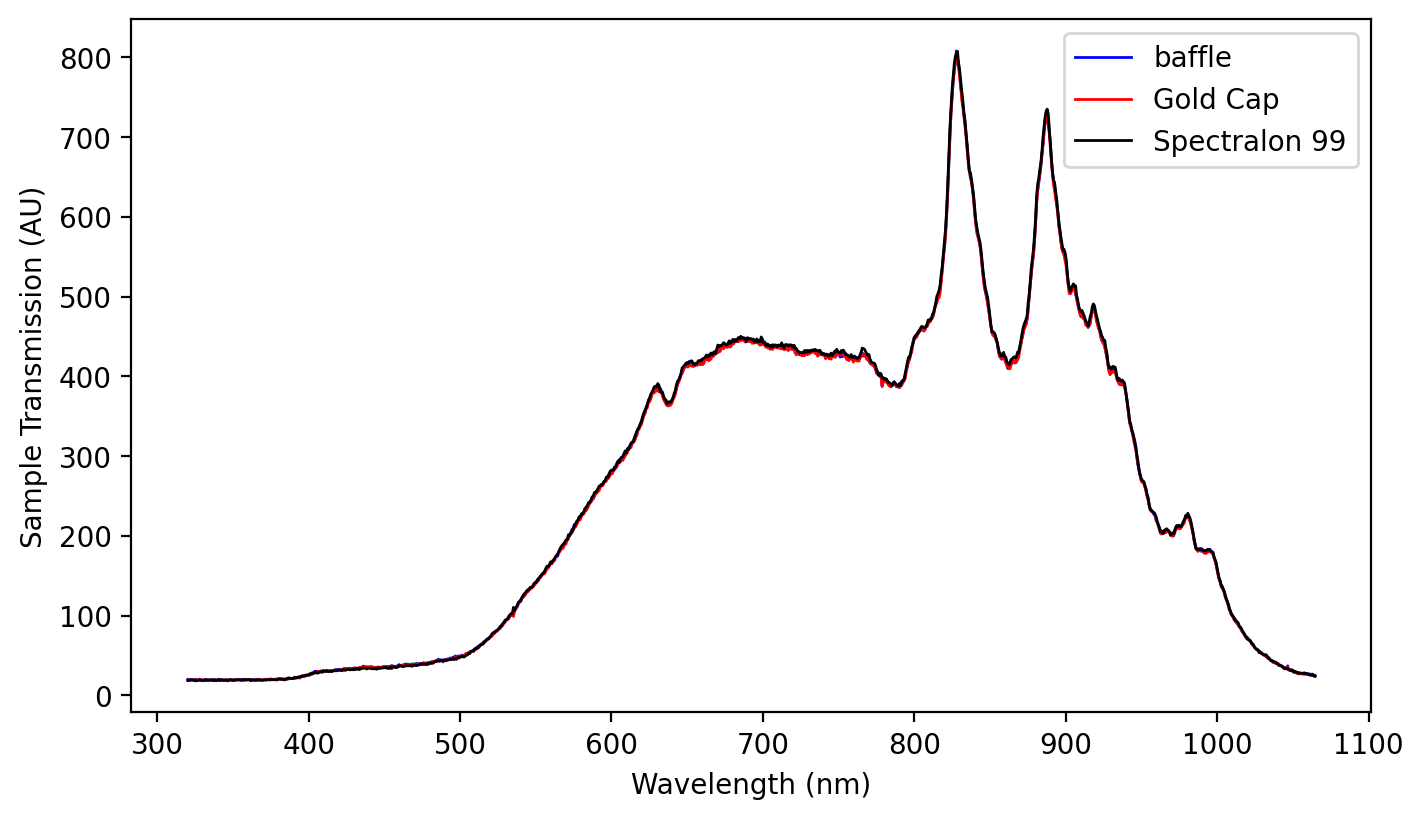

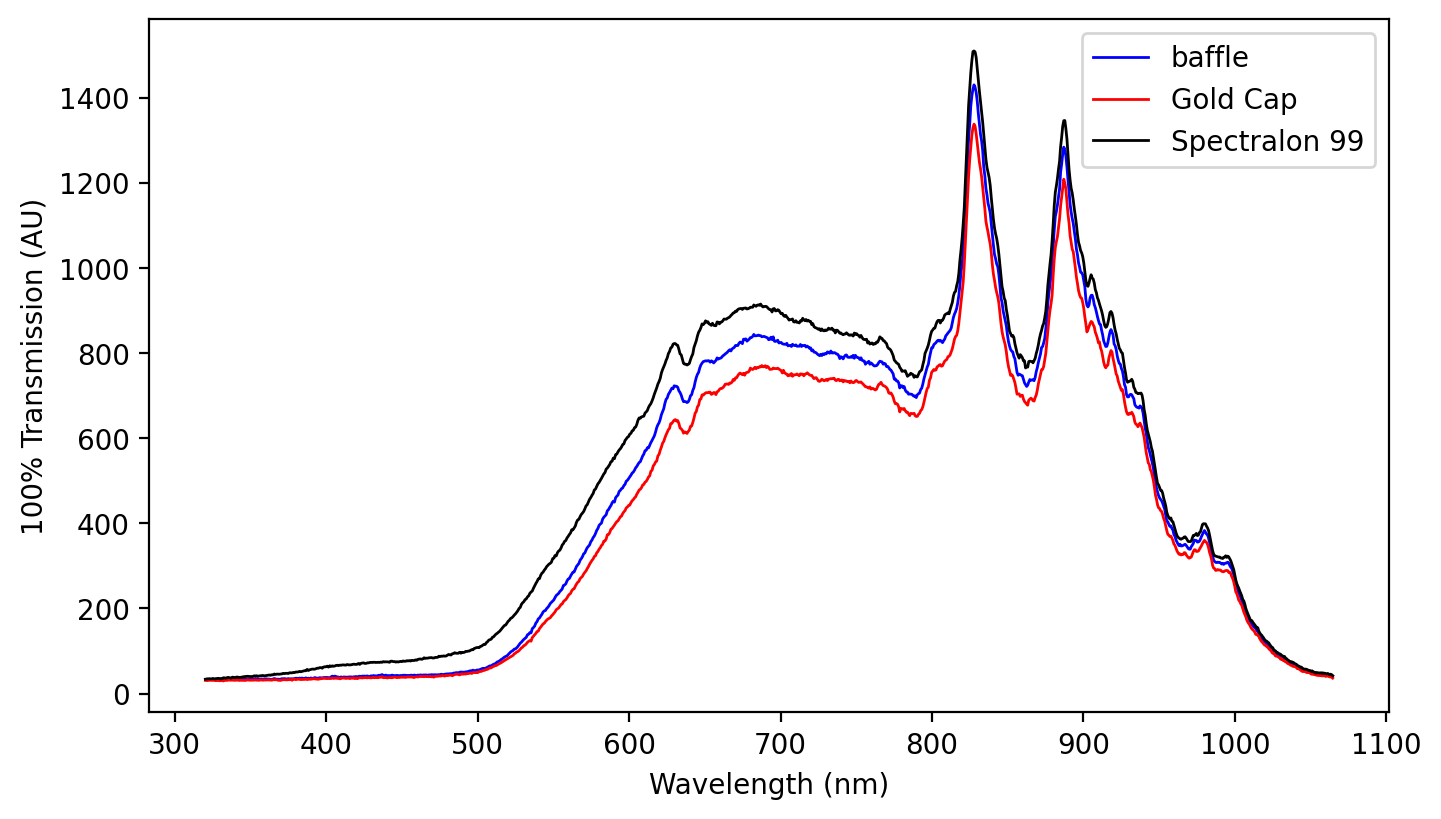

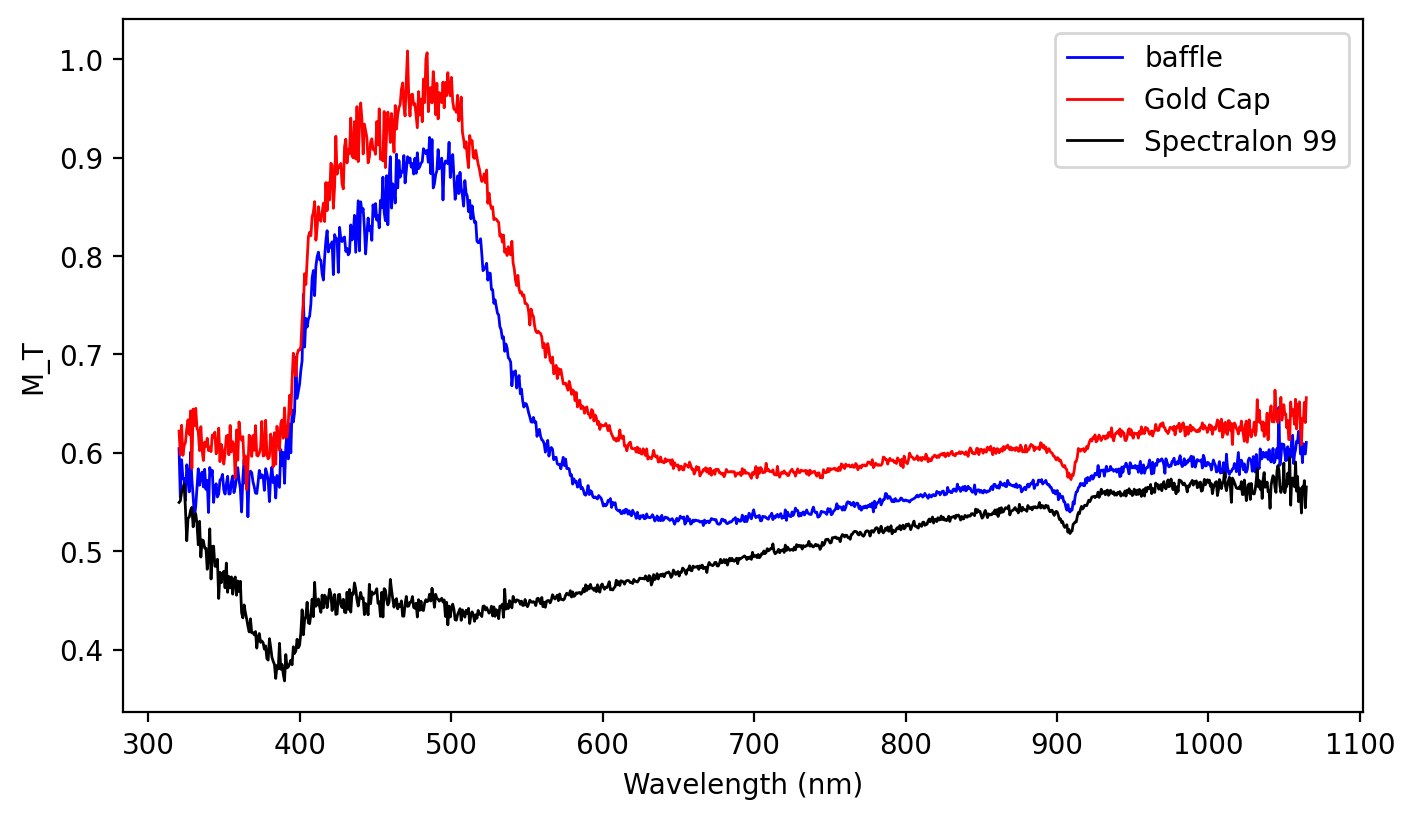

In [16]:
path = '/Users/prahl/Desktop/iad-problems/BLI/2024-3-15-Transmission-Data/'

count, lam, pd_baf_sample = np.loadtxt(path+'Ts_baf.txt', max_rows=1000, delimiter=',').T
count, lam, pd_cap_sample = np.loadtxt(path+'Ts_cap.txt', max_rows=1000, delimiter=',').T
count, lam, pd_sl99_sample = np.loadtxt(path+'Ts_sl99.txt', max_rows=1000, delimiter=',').T

count, lam, pd_baf_none = np.loadtxt(path+'T0_baf.txt', max_rows=1000, delimiter=',').T
count, lam, pd_cap_none = np.loadtxt(path+'T0_cap.txt', max_rows=1000, delimiter=',').T
count, lam, pd_sl99_none = np.loadtxt(path+'T0_sl99.txt', max_rows=1000, delimiter=',').T

lam_base = np.copy(lam)
plt.figure(figsize=(8,4.5))
plt.plot(lam, pd_baf_sample, color='blue', lw=1, label='baffle')
plt.plot(lam, pd_cap_sample, color='red', lw=1, label='Gold Cap')
plt.plot(lam, pd_sl99_sample, color='black', lw=1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Sample Transmission (AU)')
plt.legend()
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(lam, pd_baf_none, color='blue', lw = 1, label='baffle')
plt.plot(lam, pd_cap_none, color='red', lw = 1, label='Gold Cap')
plt.plot(lam, pd_sl99_none, color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('100% Transmission (AU)')
plt.legend()
plt.show()

plt.figure(figsize=(8,4.5))
plt.plot(lam, pd_baf_sample/pd_baf_none, color='blue', lw = 1, label='baffle')
plt.plot(lam, pd_cap_sample/pd_cap_none, color='red', lw = 1, label='Gold Cap')
plt.plot(lam, pd_sl99_sample/pd_sl99_none, color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('M_T')
plt.legend()
plt.show()

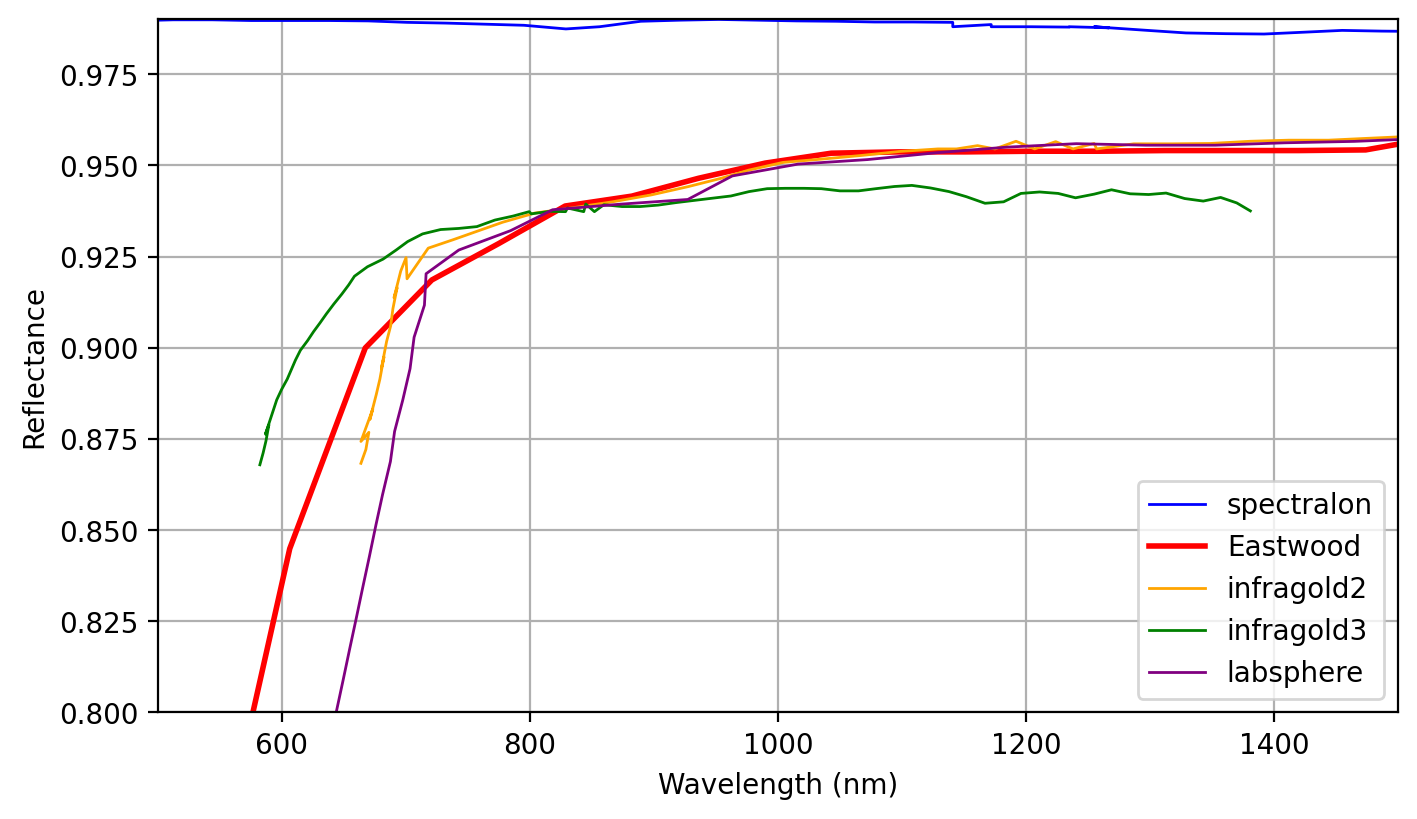

In [17]:
path = '/Users/prahl/Desktop/iad-problems/BLI/2024-3-15-Transmission-Data/'

lam_spectralon, r_spectralon = np.loadtxt(path+'spectralon.csv', skiprows=1, delimiter=',').T
lam_infragold, r_infragold = np.loadtxt(path+'infragold.csv', skiprows=1, delimiter=',').T
lam_infragold2, r_infragold2 = np.loadtxt(path+'infragold2.csv', skiprows=1, delimiter=',').T
lam_infragold3, r_infragold3 = np.loadtxt(path+'infragold3.csv', skiprows=1, delimiter=',').T
lam_infragold4, r_infragold4 = np.loadtxt(path+'infragold4.csv', skiprows=1, delimiter=',').T

plt.figure(figsize=(8,4.5))
plt.plot(lam_spectralon, r_spectralon, color='blue', lw=1, label='spectralon')
plt.plot(lam_infragold, r_infragold*1.81, color='red', lw=2, label='Eastwood')
plt.plot(lam_infragold2, r_infragold2, color='orange', lw=1, label='infragold2')
plt.plot(lam_infragold3, r_infragold3, color='green', lw=1, label='infragold3')
plt.plot(lam_infragold4, r_infragold4, color='purple', lw=1, label='labsphere')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim(500,1500)
plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()


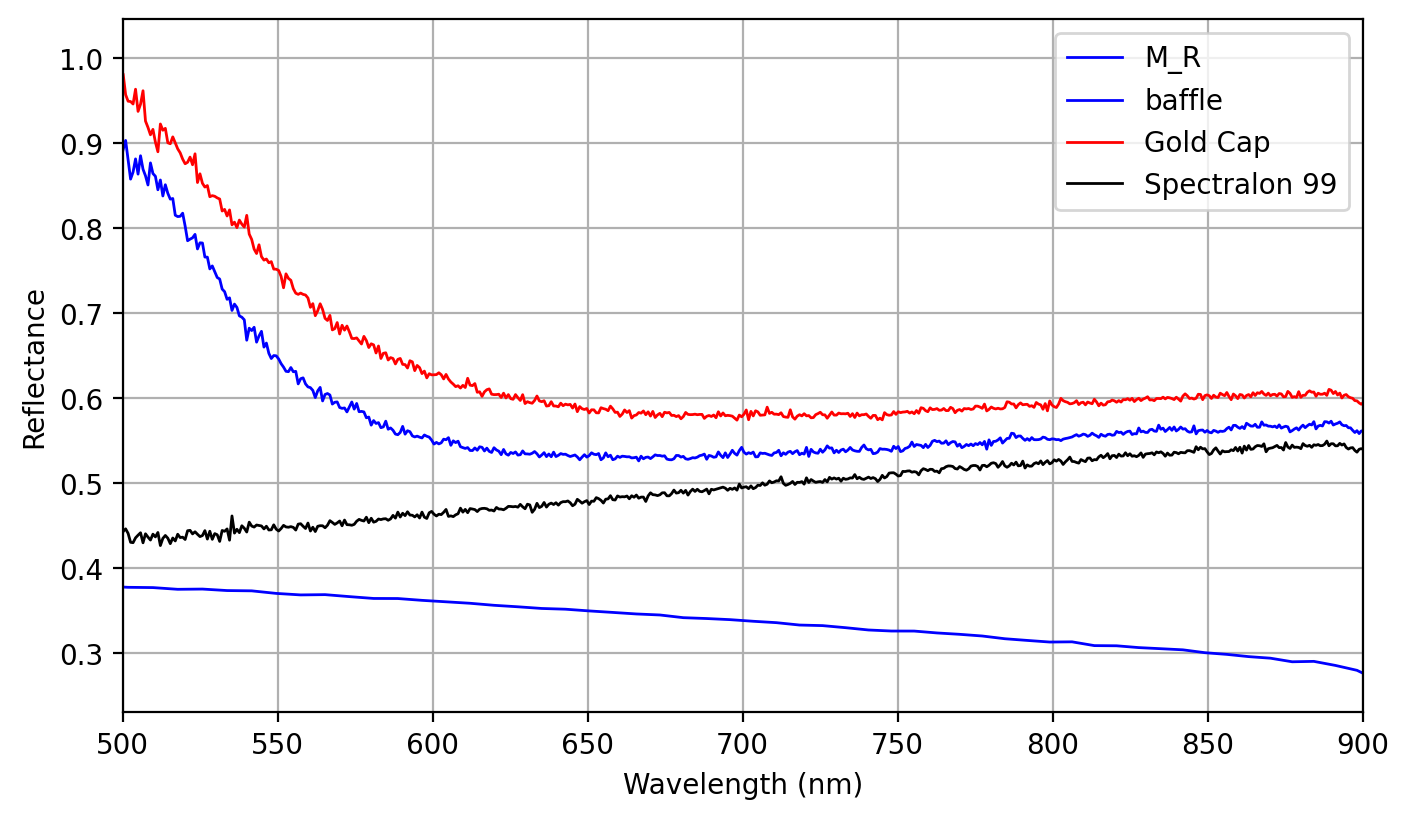

In [18]:
path = '/Users/prahl/Desktop/iad-problems/BLI/2024-3-15-Transmission-Data/'

lam_refl, r_refl = np.loadtxt(path+'refl.csv', skiprows=1, delimiter=',').T

plt.figure(figsize=(8,4.5))
plt.plot(lam_refl, r_refl, color='blue', lw=1, label='M_R')
plt.plot(lam, pd_baf_sample/pd_baf_none, color='blue', lw = 1, label='baffle')
plt.plot(lam, pd_cap_sample/pd_cap_none, color='red', lw = 1, label='Gold Cap')
plt.plot(lam, pd_sl99_sample/pd_sl99_none, color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim(500,900)
#plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()


In [19]:
def r_spectralon_fn(lam):
    return np.interp(lam, lam_spectralon, r_spectralon)

def r_infragold_fn(lam):
    return np.interp(lam, lam_infragold, r_infragold*1.81)

def r_sample_fn(lam):
    return np.interp(lam, lam_refl, r_refl)

def mt_cap_fn(lam):
    return np.interp(lam, lam_base, pd_cap_sample/pd_cap_none)

def mt_baf_fn(lam):
    return np.interp(lam, lam_base, pd_baf_sample/pd_baf_none)

def mt_sl99_fn(lam):
    return np.interp(lam, lam_base, pd_sl99_sample/pd_sl99_none)


So if we know $P_\text{detector}(\text{sample})$ and $P_\text{detector}(\text{nothing})$ then we can calculate $M_T$ or even UT1.

$$
\text{UT1} = M_T \cdot \frac{r_\text{standard} (1-a_\text{sample}) G(0, r_\text{standard})}{ G(\text{URU}, r_\text{standard})}
$$

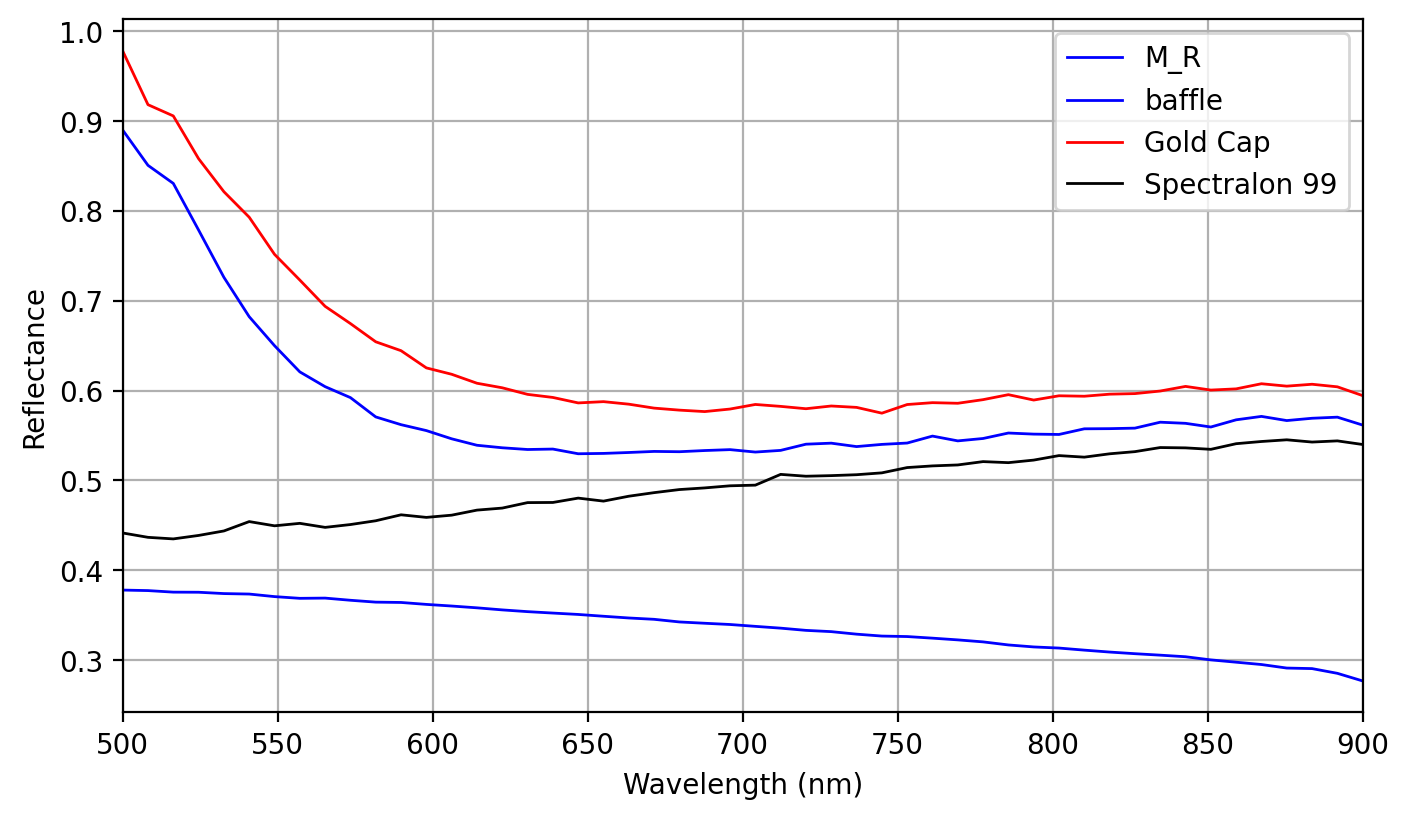

In [20]:
lambda0 = np.linspace(500,900)
plt.figure(figsize=(8,4.5))
plt.plot(lambda0, r_sample_fn(lambda0), color='blue', lw=1, label='M_R')
plt.plot(lambda0, mt_baf_fn(lambda0), color='blue', lw = 1, label='baffle')
plt.plot(lambda0, mt_cap_fn(lambda0), color='red', lw = 1, label='Gold Cap')
plt.plot(lambda0, mt_sl99_fn(lambda0), color='black', lw = 1, label='Spectralon 99')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.xlim(500,900)
#plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()

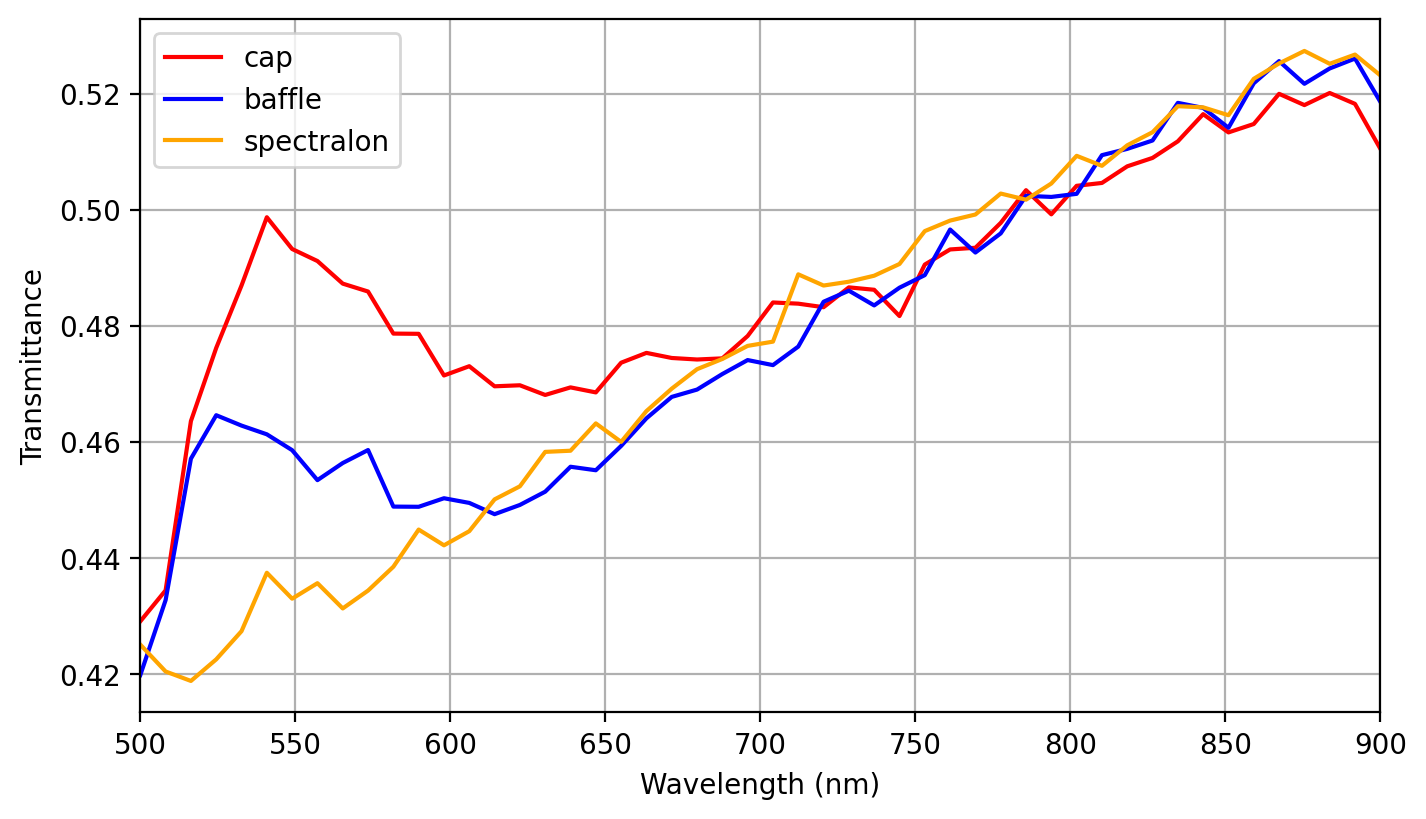

In [21]:
def UT1(s,mt,rstd):
    numer = rstd * (1-s.sample.a)*s.gain(0,rstd)
    denom = s.gain(s.sample.uru, rstd)
    return mt*numer/denom

R = 25.4*2
d_sphere = 2 * R
d_sample = 12.7
d_third = 12.7
d_detector = 2
s = iadpython.Sphere(d_sphere, d_sample, d_third=d_third, d_detector=d_detector, 
                     r_detector=0.1, r_wall=0.94, r_std=0.97)

s.sample.uru = r_sample_fn(lambda0)

ut1_cap = UT1(s,mt_cap_fn(lambda0),r_infragold_fn(lambda0)*0.93)
ut1_baf = UT1(s,mt_baf_fn(lambda0),r_infragold_fn(lambda0))
ut1_sl99 = UT1(s,mt_sl99_fn(lambda0),r_spectralon_fn(lambda0))

plt.plot(lambda0, ut1_cap, color='red', label='cap')
plt.plot(lambda0, ut1_baf, color='blue', label='baffle')
plt.plot(lambda0, ut1_sl99, color='orange', label='spectralon')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance')
plt.xlim(500,900)
#plt.ylim(0.8,0.99)
plt.legend()
plt.grid()
plt.show()